In [14]:
pip install -Uq pandas numpy seaborn matplotlib plotly

Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn

In [3]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

gen_sub_data = pd.read_csv("gender_submission.csv")
print(gen_sub_data)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [4]:
gen_sub_data['Survived'].isnull().sum()

0

In [5]:
train_data = pd.read_csv("train.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
delimiter = 20*"-"
print(f"\tПропуски: \nТренировочные данные:\n{train_data.isnull().sum()}\n{delimiter}\nТестовые данные:\n{test_data.isnull().sum()}\n{delimiter}\nИдентификаторы пассажиров:\n{gen_sub_data.isnull().sum()}\n{delimiter}")

	Пропуски: 
Тренировочные данные:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
--------------------
Тестовые данные:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
--------------------
Идентификаторы пассажиров:
PassengerId    0
Survived       0
dtype: int64
--------------------


In [9]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
train_data.drop("Cabin", axis=1, inplace=True)
train_data = train_data.dropna(axis=0, how="any")

In [11]:
test_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
test_data.drop("Cabin", axis=1, inplace=True)
test_data = train_data.dropna(axis=0, how="any")

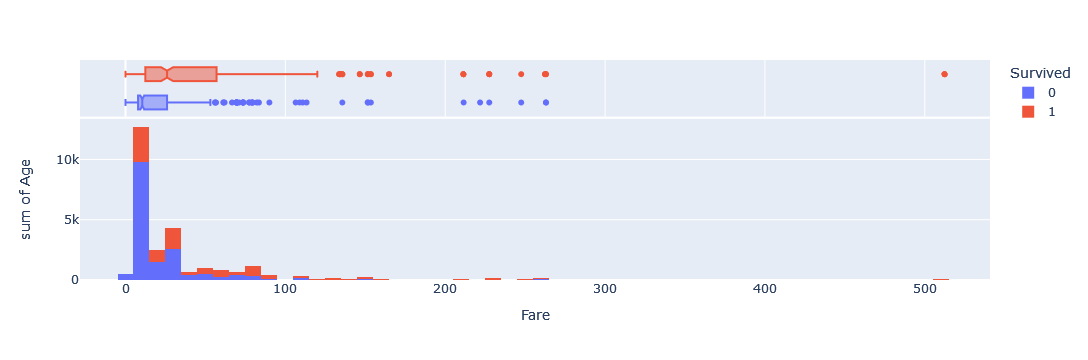

In [21]:
fig = px.histogram(
    train_data,
    x="Fare",
    y="Age",
    color="Survived",
    marginal="box",
)
fig.show()

# Выброс: пассажир, заплативший 512 за билет
# НЕ Выброс: восьмидесятилетний пассажир -- вполне вероятно, что среди пассажиров был восьмидесятилетний человек

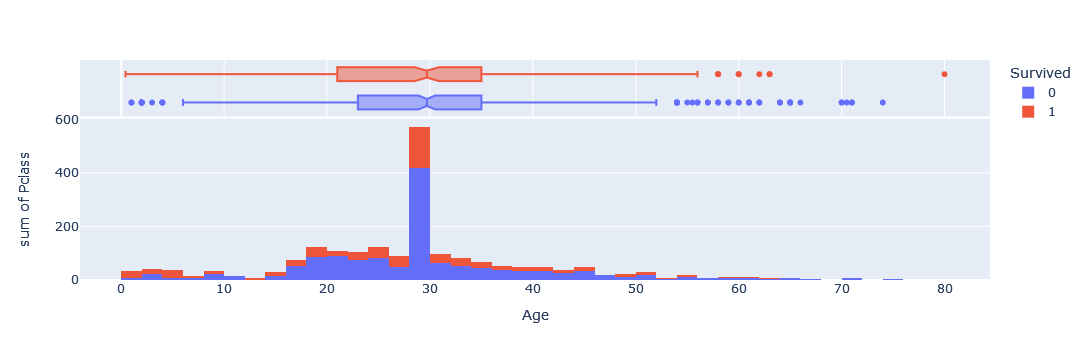

In [26]:
fig = px.histogram(train_data,
                 y="Pclass",
                 x="Age",
                color="Survived",
                marginal="box",
)
fig.show()

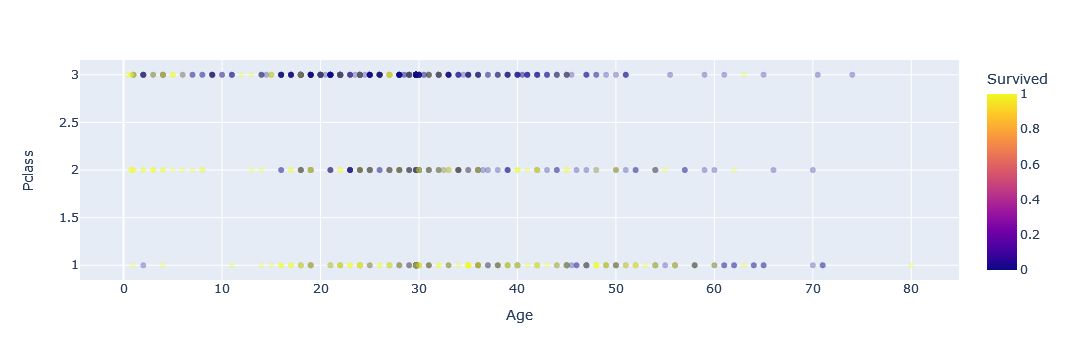

In [33]:
fig = px.scatter(train_data,
                 y="Pclass",
                 x="Age",
                color="Survived",
                opacity=.3)
fig.show()

# Большинство пассажиров 3го класса -- в основном относительно молодые -- погибли; большинство пассажиров 1го класса -- большинство старше других большинств пассажиров -- выжили

In [32]:
demographics = train_data["Age", "Sex", "Pclass"]
seaborn.heatmap(demographics, annot=True)

KeyError: ('Age', 'Sex', 'Pclass')